In [1]:
# Setup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
df = pd.read_csv("players_20.csv")
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [41]:
# Simplify the data by removing unnecessary columns
no_need_cols = [
    'player_url',
    'long_name',
    'body_type',
    'dob',
    'real_face',
    'release_clause_eur',
    'player_tags',
    'team_position',
    'team_jersey_number',
    'loaned_from',
    'joined',
    'contract_valid_unti',
    'nation_position',
    'nation_jersey_number',
    'international_reputation',
    'contract_valid_until',
    'value_eur',
    'wage_eur'
]

for cl in df.columns:
    if cl in no_need_cols:
        del df[cl]

0      RW, CF, ST
1          ST, LW
2         LW, CAM
3              GK
4          LW, CF
5         CAM, CM
6              GK
7              CB
8              CM
9          RW, ST
10         ST, RW
11             CB
12             ST
13             GK
14             GK
15        CDM, CM
16             CB
17             ST
18             CB
19             ST
20             ST
21        CDM, CM
22     CF, ST, LW
23        CAM, RW
24        CM, CDM
25             GK
26         RW, LW
27        CAM, CM
28             GK
29             CB
30             GK
31             GK
32             GK
33        CAM, CM
34             ST
35             CB
36             CM
37    CAM, LM, ST
38         ST, LM
39         LW, LM
40         CB, LB
41    RW, CAM, CM
42            CDM
43         CF, LM
44            CDM
45             CB
46         CF, ST
47             CB
48         CF, ST
49             CB
Name: player_positions, dtype: object

In [3]:
#  Best GoalKeeper
# weights
a = 0.5
b = 1
c = 1.5
d = 2

# Ideal GK = One good at stopping shots and good with his feet(passing, clearing)
# Ideal Shot Stopper GK chrachteristics
df['gk_Shot_Stopper'] = (a*df.gk_speed + a*df.power_jumping + b*df.movement_reactions + b*df.mentality_composure + b*df.power_strength + c*df.gk_positioning + c*df.gk_diving + c*df.gk_reflexes + c*df.gk_handling)/(4*a + 1*b + 4*c + 1*d)
df['gk_Sweeper'] =( a*df.gk_speed + a*df.power_jumping + b*df.gk_kicking + b + df.mentality_vision + b*df.mentality_composure + b*df.movement_reactions + b*df.power_strength + c*df.gk_diving + c*df.gk_reflexes + c*df.gk_handling + d*df.gk_positioning)/(2*a + 5*b + 3*c + 1*d)
df.power_strength.head()

0    68
1    78
2    49
3    78
4    63
Name: power_strength, dtype: int64

In [4]:
# make the data sequential and plot
# plt.figure(figsize=(15,6))
# sd = df.sort_values('gk_Shot_Stopper', ascending=False)[:10]
# x1 = np.array(list(sd['short_name']))
# y1 = np.array(list(sd['gk_Shot_Stopper']))
# sns.barplot(x1, y1, palette= "colorblind")
# plt.ylabel("Shot Stopping Score")

In [5]:
# plt.figure(figsize=(15,6))
# sd = df.sort_values('gk_Sweeper', ascending=False)[:10]
# x2 = np.array(list(sd['short_name']))
# y2 = np.array(list(sd['gk_Sweeper']))
# sns.barplot(x2, y2, palette= "colorblind")
# plt.ylabel("Sweeping Score")

In [44]:
df['df_centre_backs'] = (a*df.skill_long_passing +a*df.passing + a*df.movement_acceleration + a*df.pace + b*df.mentality_composure + c*df.mentality_interceptions + d*df.defending + d*df.defending_sliding_tackle + d*df.defending_standing_tackle + b*df.power_stamina + d*df.power_jumping + d*df.attacking_heading_accuracy + d*df.defending_marking + c*df.mentality_aggression)/(3*a + 2*b + 2*c + 6*d)
df['df_wing_backs']   = (a*df.dribbling + a*df.mentality_vision + b*df.defending + b*df.defending_marking + b*df.skill_ball_control + b*df.defending_standing_tackle + b*df.attacking_short_passing + c*df.attacking_crossing + c*df.skill_long_passing + d*df.movement_acceleration + d*df.pace + d*df.power_stamina)/(2*a + 5*b + 2*c + 3*d)

Text(0, 0.5, 'defending score')

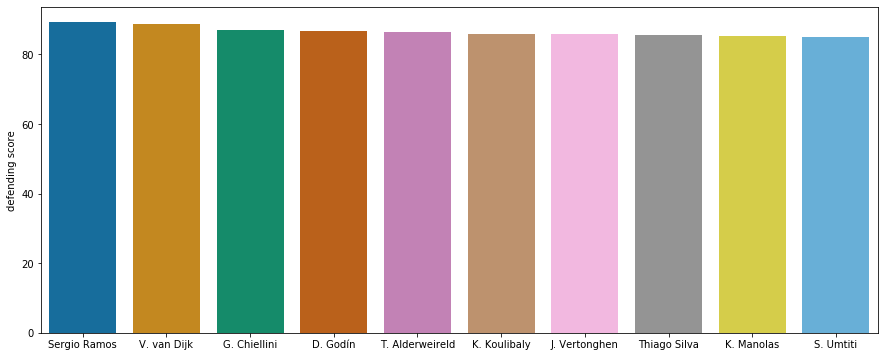

In [45]:
plt.figure(figsize=(15,6))
sd = df[(df['player_positions'] == 'CB')].sort_values('df_centre_backs', ascending=False)[:10]
x3 = np.array(list(sd['short_name']))
y3 = np.array(list(sd['df_centre_backs']))
sns.barplot(x3, y3, palette= "colorblind")
plt.ylabel("defending score")

Text(0, 0.5, 'defending score')

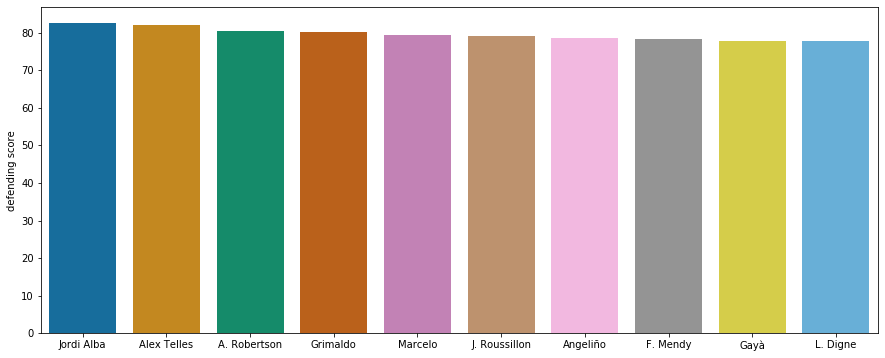

In [46]:
plt.figure(figsize=(15,6))
sd = df[(df['player_positions'] == 'LB')].sort_values('df_wing_backs', ascending=False)[:10]
x4 = np.array(list(sd['short_name']))
y4 = np.array(list(sd['df_wing_backs']))
sns.barplot(x4, y4, palette= "colorblind")
plt.ylabel("defending score")

Text(0, 0.5, 'defending score')

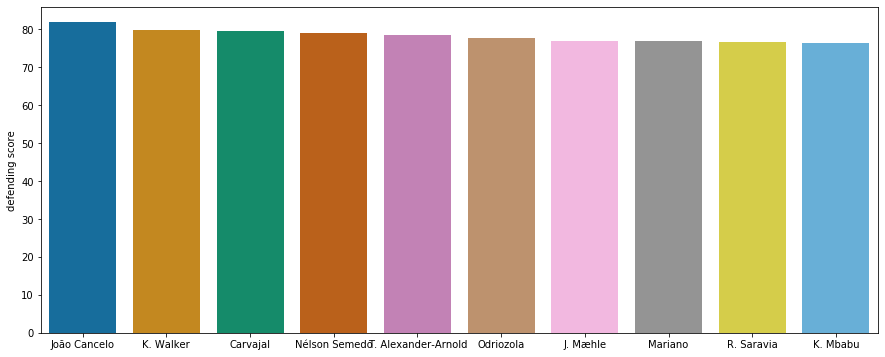

In [47]:
plt.figure(figsize=(15,6))
sd = df[(df['player_positions'] == 'RB')].sort_values('df_wing_backs', ascending=False)[:10]
x5 = np.array(list(sd['short_name']))
y5 = np.array(list(sd['df_wing_backs']))
sns.barplot(x5, y5, palette= "colorblind")
plt.ylabel("defending score")

In [68]:
# midfielders
df['cmf_playmaker'] = (d*df.skill_ball_control + d*df.dribbling + a*df.defending_marking + d*df.movement_reactions + d*df.mentality_vision + c*df.mentality_positioning + c*df.attacking_crossing + d*df.attacking_short_passing + c*df.skill_long_passing + c*df.skill_curve + b*df.power_long_shots + c*df.skill_fk_accuracy)/(1*a + 1*b + 4*c + 4*d)
df['cdm_destroyer'] = (d*df.movement_agility + c*df.movement_balance + b*df.power_jumping + c*df.power_strength + c*df.physic + d*df.power_stamina + a*df.movement_acceleration + d*df.passing + c*df.mentality_aggression + d*df.movement_reactions + b*df.defending_marking + b*df.defending_standing_tackle + b*df.defending_sliding_tackle + b*df.mentality_interceptions)/(1*a + 5*b + 4*c + 4*d)
df['cmf_box_to_box'] = (b*df.weak_foot + d*df.skill_ball_control + a*df.dribbling + a*df.defending_marking + a*df.movement_reactions + c*df.mentality_vision + c*df.mentality_composure + d*df.passing + d*df.skill_long_passing + d*df.power_stamina + b*df.movement_acceleration + b*df.pace)/(2*c + 4*d + 4*a + b*2)

Text(0, 0.5, 'playmaking score')

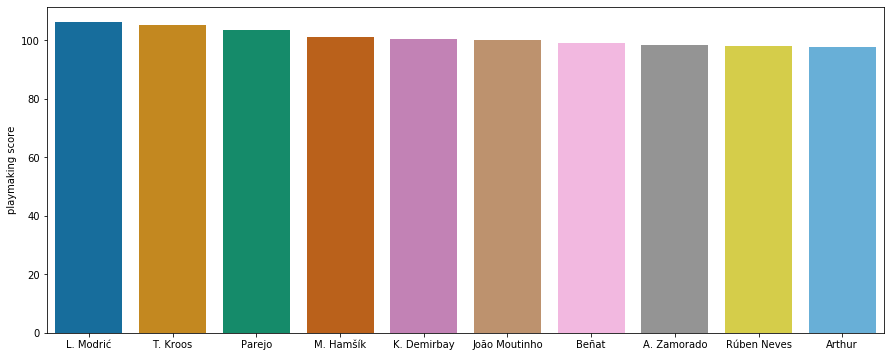

In [69]:
plt.figure(figsize=(15,6))
sd = df[(df['player_positions'] == 'CM') | (df['player_positions'] == 'LM')].sort_values('cmf_playmaker', ascending=False)[:10]
x6 = np.array(list(sd['short_name']))
y6 = np.array(list(sd['cmf_playmaker']))
sns.barplot(x6, y6, palette= "colorblind")
plt.ylabel("playmaking score")

Text(0, 0.5, 'interception score')

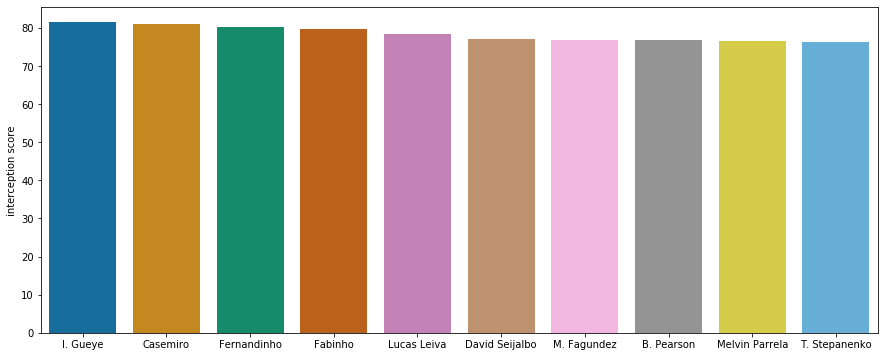

In [70]:
plt.figure(figsize=(15,6))
sd = df[(df['player_positions'] == 'CDM')].sort_values('cdm_destroyer', ascending=False)[:10]
x7 = np.array(list(sd['short_name']))
y7 = np.array(list(sd['cdm_destroyer']))
sns.barplot(x7, y7, palette= "colorblind")
plt.ylabel("interception score")

Text(0, 0.5, 'pressing score')

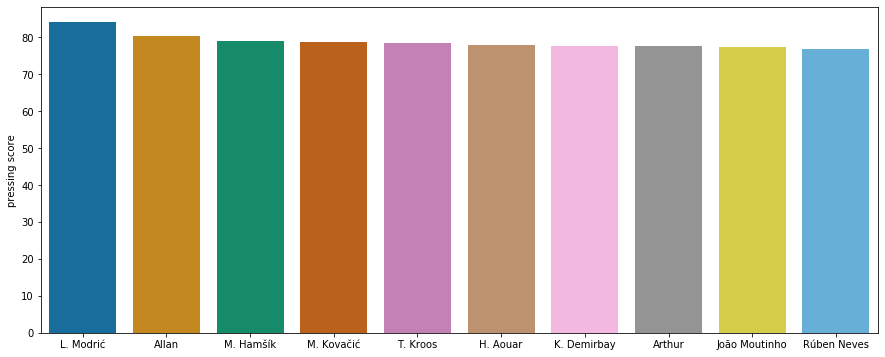

In [71]:
plt.figure(figsize=(15,6))
sd = df[(df['player_positions'] == 'CM') | (df['player_positions'] == 'RM')].sort_values('cmf_box_to_box', ascending=False)[:10]
x6 = np.array(list(sd['short_name']))
y6 = np.array(list(sd['cmf_box_to_box']))
sns.barplot(x6, y6, palette= "colorblind")
plt.ylabel("pressing score")